# Participant (NEW) data: Analysis and Modeling

## Some imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

# Data Import - *participant level* Master DF

In [2]:
path = '../CleanedData/masterDF.csv'
df = pd.read_csv(path, encoding = 'unicode_escape', sep = ",")

In [3]:
df.shape

(391, 35)

In [4]:
df.columns

Index(['good_pointing_coding_between', 'good_pointing_coding_within',
       'bad_pointing_coding_between', 'bad_pointing_coding_within',
       'participant', 'Original_Study_Number', 'SBSOD', 'gender', 'WRAT',
       'Model_Building', 'Model_Building_A', 'Model_Building_B',
       'K_Means_Across_All', 'Model_Building_Average_Within',
       'Education_Numeric', 'New_or_Original', 'trackpad/mouse', 'Site',
       'Experimenter ', 'NOTES', 'Age', 'Hispanic', 'Racial_Category',
       'Racial_Category_Text', 'Education_Level', 'Education_Level_Text',
       'Handedness', 'First_Language', 'Age_started_speaking_English',
       'Participant_UUID_Silcton', 'date', 'MRT', 'good_pointing_coding_total',
       'bad_pointing_coding_total', 'Color'],
      dtype='object')

# Data Analysis - *participant level* Master DF

## Preliminaries

In [5]:
# this section can be skipped, if it is not interesting. I just tried to understand the variables of the dataset

In [6]:
# variable
'good_pointing_coding_between', 
'good_pointing_coding_within',
'bad_pointing_coding_between', 
'bad_pointing_coding_within',
'participant', 
'Original_Study_Number', 
'SBSOD', 
'gender', 
'WRAT',
'Model_Building', 
'Model_Building_A', 
'Model_Building_B',
'K_Means_Across_All', 
'Model_Building_Average_Within',
'Education_Numeric', 
'New_or_Original', 
'trackpad/mouse', 
'Site',
'Experimenter ', 
'NOTES', 
'Age', 
'Hispanic', 
'Racial_Category',
'Racial_Category_Text', 
'Education_Level', 
'Education_Level_Text',
'Handedness', 
'First_Language', 
'Age_started_speaking_English',
'Participant_UUID_Silcton', 
'date', 
'MRT', 
'good_pointing_coding_total',
'bad_pointing_coding_total'

'bad_pointing_coding_total'

In [7]:
# describing selected variables
x = 'good_pointing_coding_between'
df[x].describe()

count    391.000000
mean      47.756307
std       17.063426
min        7.906232
25%       35.828410
50%       49.302534
75%       59.309263
max       95.921731
Name: good_pointing_coding_between, dtype: float64

In [8]:
# unique values of selected variables
df[x].unique()

array([78.22745098, 35.05201226, 46.90887339, 44.62639493, 63.83585475,
       53.49372235, 32.6096    , 53.84209017, 79.03865112, 42.09230367,
       16.20731014, 59.29779865, 48.02258835, 43.48360921, 55.36133232,
       62.65897109, 53.72053447, 85.73268421, 47.64583759, 21.59453864,
       64.80768702, 69.81721435, 70.7461531 , 32.56217582, 22.71944115,
       39.30538438, 35.17623416, 30.92800995, 60.65936318, 85.04692758,
       64.49438724, 65.4631086 , 20.74301032, 68.916295  , 34.10212938,
       11.49146936, 58.44685133, 29.63482   , 72.89202848, 84.99432949,
       19.42789421, 63.71403302, 33.2024758 , 95.92173064, 43.24751743,
       34.01233105, 26.92121226, 60.1034374 , 37.4178535 , 52.37581618,
       40.92923432, 40.3389091 , 64.16471648, 37.50174122, 64.03614699,
       43.71615481, 60.53173786, 71.53772388, 70.96729528, 65.41163641,
       13.16818849, 78.08033594, 71.56853896, 58.51154023, 74.35011617,
       60.91462421, 25.72805344, 70.38575721, 49.65411112, 64.12

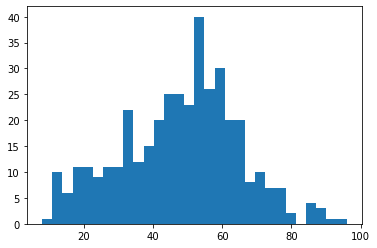

In [9]:
# plotting histograms of selected variables
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df[x], bins = 30)
plt.show()

## Biplots and correlations on NEW data

In [10]:
# let us have a look at selected biplots and compute correlations on NEW data

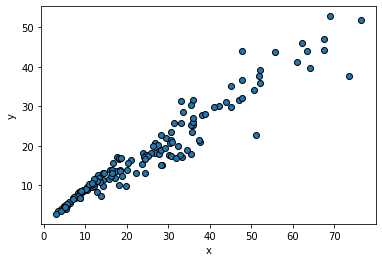

Pearson correlation and p-value 0.9651462521618235
Pearson p-value 2.6297438663917975e-86

Spearman correlation 0.9751565935518969
Spearman p-value 8.226208685237988e-97


In [11]:
# variables to be considered
############################

# 'good_pointing_coding_between' 
# 'good_pointing_coding_within' 
# 'bad_pointing_coding_between'  
# 'bad_pointing_coding_within'  
# 'bad_pointing_coding_total'  
# 'bad_pointing_coding_total'  

x='good_pointing_coding_within'
y='bad_pointing_coding_within'  

# we consider only NEW data
df_b = df[df.New_or_Original=='New']

fig, ax = plt.subplots()
ax.scatter(df_b[x], df_b[y], edgecolors=(0, 0, 0))

#plt.plot(df_b[x], df_b[x]) # uncomment if you want display the bisector
#m, b = np.polyfit(df_b[x], df_b[y], 1) # uncomment if you want display the linear fit (watch out - what is x?)
#plt.plot(df_b[x], b+m*df_b[x])

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# correlations
from scipy.stats import spearmanr
from scipy.stats import pearsonr

corrp, ppvalue = pearsonr(df_b[x], df_b[y])
corrs, spvalue = spearmanr(df_b[x], df_b[y])
print('Pearson correlation and p-value', corrp)
print('Pearson p-value', ppvalue)
print()
print('Spearman correlation', corrs)
print('Spearman p-value', spvalue)

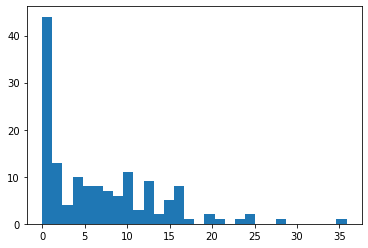

count    1.470000e+02
mean     6.838078e+00
std      6.779133e+00
min      5.000000e-10
25%      8.165802e-01
50%      5.206346e+00
75%      1.064070e+01
max      3.583096e+01
dtype: float64


In [12]:
# distribution discrepancies
import matplotlib.pyplot as plt
%matplotlib inline

delta = df_b[x]-df_b[y]

plt.hist(delta, bins = 30)
plt.show()

print(delta.describe())

# MODELING good_pointing_X=f(bad_pointing_X), on NEW participant data

In [13]:
# Following the "correction machine" idea, we predict good_pointing_X using bad_pointing_X on NEW data, only (147 samples).

## Modeling data preparation

In [14]:
# chosen variables for modeling
chosen_variables = [
'bad_pointing_coding_within'
#'bad_pointing_coding_between'
#'bad_pointing_coding_total' 
]

# target
target = 'good_pointing_coding_within'

In [15]:
# IMPORTANT: according to the "correction machine logic", we 1) train on NEW data (where both good and bad pointing variables 
# are defined), and 2) we predict the "best guess" for the good_pointing_X variables on ORIGINAL data, 
# using the only information available, i.e., the bad_pointing_X variable.

In [16]:
# we train only on NEW data
df_train = df[df.New_or_Original=='New']
df_train = df_train[np.concatenate((chosen_variables, [target]), axis=0)]
df_train = df_train.dropna() # there are no NAs anyhow

# we test only on Original data
df_test = df[df.New_or_Original=='Original']
df_test = df_test[np.concatenate((chosen_variables, [target]), axis=0)]
df_test = df_test.dropna() # there are no NAs anyhow

print(df_train.shape)
print(df_test.shape)

(147, 2)
(244, 2)


In [17]:
# with what are we going to model?
df_train.columns

Index(['bad_pointing_coding_within', 'good_pointing_coding_within'], dtype='object')

In [18]:
# training data
X_train = df_train.drop(columns=[target])
y_train = df_train[target]

# test data
X_test = df_test.drop(columns=[target])

## Modeling: univariate regression

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

print('Linear regression coefficient:', reg.coef_)
print('Linear regression: intercept:', reg.intercept_)

Linear regression coefficient: [1.4468279]
Linear regression: intercept: -1.1836310989449288


In [20]:
# p-values: alternative approach. We use statsmodels
import statsmodels.api as sm
X_train_p = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_train_p)

fii = mod.fit()
print(fii.summary())

                                 OLS Regression Results                                
Dep. Variable:     good_pointing_coding_within   R-squared:                       0.932
Model:                                     OLS   Adj. R-squared:                  0.931
Method:                          Least Squares   F-statistic:                     1972.
Date:                         Fri, 05 Feb 2021   Prob (F-statistic):           2.63e-86
Time:                                 16:49:37   Log-Likelihood:                -428.29
No. Observations:                          147   AIC:                             860.6
Df Residuals:                              145   BIC:                             866.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

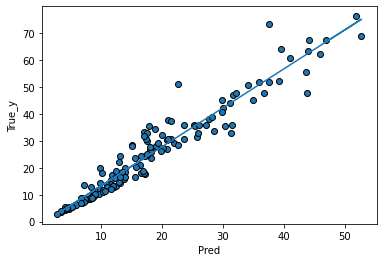

In [21]:
# PLOT PREDICTIONS VS TRUE VALUES
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, edgecolors=(0, 0, 0))

plt.plot(X_train, reg.predict(X_train))
ax.set_xlabel('Pred')
ax.set_ylabel('True_y')
#path_png = 'INSERT PATH.png'
#figure.savefig(path_png, dpi=400)

plt.show()

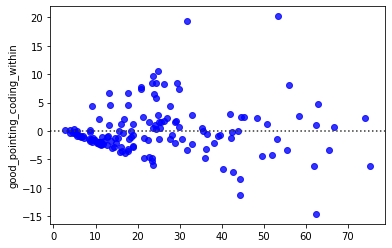

In [22]:
# PLOT RESIDUALS
import numpy as np
import seaborn as sns

# Plot the residuals after fitting a linear model
resid= sns.residplot(x=reg.predict(X_train), y=y_train, lowess=False, label=None, color="b")
resid
figure = resid.get_figure()
#path_png = 'INSERT PATH.png'
#figure.savefig(path_png, dpi=400)

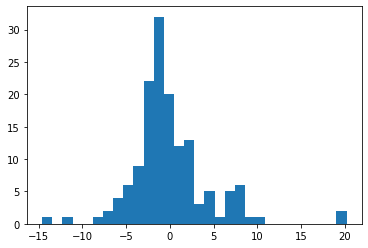

In [23]:
# HISTOGRAM RESIDUALS
# histogram of test scores
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train-reg.predict(X_train), bins = 30)
#hist_png = 'INSERT PATH.png'
#plt.savefig(hist_png, dpi=400)
plt.show()

In [24]:
# fitting best model to whole dataset *IN SAMPLE*
reg.fit(X_train, y_train)

import sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R^2 on whole dataset')
print(r2_score(y_train, reg.predict(X_train)))
print('---------------------')
print('MSE on whole dataset')
print(mean_squared_error(y_train, reg.predict(X_train)))
print('---------------------')
print('MAE on whole dataset')
print(mean_absolute_error(y_train, reg.predict(X_train)))

R^2 on whole dataset
0.9315072880620142
---------------------
MSE on whole dataset
19.86988573174959
---------------------
MAE on whole dataset
3.0296820261390356


## Robustness of performance: cross-validation

In [25]:
# R2 is in-sample. Does it drop in presence of repeated cross-validation? If yes, can we quantify this drop? We do it
# for the univariate regression models.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

# scorer
###############################################################
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

r2_scorer = make_scorer(r2_score)

# choice of scorer
scorer = r2_scorer

# random state
###############################################################
random_state=123
                            
# regressor (univariate linear regression)
###############################################################
clf = linear_model.LinearRegression()
    
# GRID SEARCH
##############################################################

# pipeline
pipe = Pipeline([('clf', clf)])

# PARAMETER GRID - we do nothing
##############################################################
param_grid = {}

# The repeated k-fold
##############################################################
n_folds=5     
n_repeats=100  

skfold = RepeatedKFold(n_splits=n_folds,
                       n_repeats=n_repeats,
                       random_state=random_state)

# GRID SEARCH
#############################################################
grid_clf = GridSearchCV(pipe, 
                        param_grid,
                        scoring=scorer,
                        cv=skfold, 
                        verbose=5)
                        
# RUNNING THE GRID
############################################
grid_clf.fit(X_train, y_train) 

Fitting 500 folds for each of 1 candidates, totalling 500 fits
[CV]  ................................................................
[CV] .................................... , score=0.913, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.906, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.937, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.961, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.909, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.926, total=   0.0s
[CV]  ................................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.883, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.940, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.881, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.953, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.955, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.956, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.954, total=   0.0s
[CV]  

[CV] .................................... , score=0.931, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.926, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.832, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.951, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.961, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.961, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.909, total=   0.0s
[CV]  ................................................................
[CV] .

[CV] .................................... , score=0.938, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.966, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.935, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.843, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.965, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.875, total=   0.0s
[CV]  ................................................................
[CV] .

[CV] .................................... , score=0.881, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.888, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.920, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.884, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.989, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.913, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.943, total=   0.0s
[CV]  ................................................................
[CV] .

[CV] .................................... , score=0.920, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.886, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.947, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.943, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.935, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.888, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.949, total=   0.0s
[CV]  ................................................................
[CV] .

[CV] .................................... , score=0.929, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.928, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.970, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.861, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.898, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.928, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.936, total=   0.0s
[CV]  ................................................................
[CV] .

[CV] .................................... , score=0.947, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.965, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.896, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.963, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.942, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.946, total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=100, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('clf', LinearRegression())]),
             param_grid={}, scoring=make_scorer(r2_score), verbose=5)

In [27]:
# COLLECTING RESULTS
##############################################################

# best estimator
clf_b = grid_clf.best_estimator_

# print results
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Best parameters:', grid_clf.best_params_)
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Mean performance (and standard deviation):')
print(grid_clf.cv_results_['mean_test_score'][grid_clf.best_index_])
print(grid_clf.cv_results_['std_test_score'][grid_clf.best_index_])

-------------------------------------------------------
-------------------------------------------------------
Best parameters: {}
-------------------------------------------------------
-------------------------------------------------------
Mean performance (and standard deviation):
0.9230358075187582
0.03309816802440321


In [28]:
# double chek on the model
clf_b.fit(X_train, y_train)

print('R^2 on whole dataset')
print(r2_score(y_train, clf_b.predict(X_train)))
print('---------------------')
print('MSE on whole dataset')
print(mean_squared_error(y_train, clf_b.predict(X_train)))
print('---------------------')
print('MAE on whole dataset')
print(mean_absolute_error(y_train, clf_b.predict(X_train)))

R^2 on whole dataset
0.9315072880620142
---------------------
MSE on whole dataset
19.86988573174959
---------------------
MAE on whole dataset
3.0296820261390356


## Modeling: easy regression tree

In [29]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor

# scorer
###############################################################
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_scorer = make_scorer(r2_score)
mean_sq_scorer = make_scorer(mean_squared_error, greater_is_better=False) # important: the higher, the worse
mean_ab_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# choice of scorer
#scorer = mean_sq_scorer
scorer = r2_scorer

# random state
###############################################################
random_state=123
                            
# regressor
###############################################################
clf = DecisionTreeRegressor(random_state=random_state)
    
# GRID SEARCH
##############################################################

# pipeline
pipe = Pipeline([('clf', clf)])

# PARAMETER GRID
##############################################################
param_grid = {'clf__max_depth': [1, 2, 3, 4, 5, 6, 7]}

# # THE REPEATED K FOLD
# #########################################
n_folds=5     #5
n_repeats=100  #50

skfold = RepeatedKFold(n_splits=n_folds,
                        n_repeats=n_repeats,
                        random_state=random_state)

# GRID SEARCH
#############################################
grid_clf = GridSearchCV(pipe, 
                        param_grid,
                        scoring=scorer,
                        cv=skfold, 
                        verbose=5)
                        
# RUNNING THE GRID
############################################
grid_clf.fit(X_train, y_train) 

Fitting 500 folds for each of 7 candidates, totalling 3500 fits
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.592, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.628, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.516, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.606, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.458, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.319, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .................... clf__max_depth=1, score=0.601, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.602, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.606, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.654, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.457, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.604, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.629, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .

[CV] .................... clf__max_depth=1, score=0.602, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.478, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.665, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.358, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.611, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.454, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.631, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .

[CV] .................... clf__max_depth=1, score=0.338, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.595, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.404, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.622, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.632, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.564, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.276, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .

[CV] .................... clf__max_depth=1, score=0.593, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.199, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.581, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.570, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.603, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.479, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.598, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .

[CV] .................... clf__max_depth=1, score=0.439, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.556, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.675, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.605, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.552, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.681, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .................... clf__max_depth=1, score=0.339, total=   0.0s
[CV] clf__max_depth=1 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.787, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.853, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.878, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.883, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.718, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.913, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.790, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.732, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.930, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.889, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.848, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.703, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.852, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.867, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.798, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.872, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.804, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.892, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.849, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.813, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.878, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.794, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.782, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.801, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.876, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.863, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.815, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.852, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.813, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.838, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.868, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.862, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.755, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.898, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.874, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=2, score=0.886, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.876, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.850, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.874, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.870, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.834, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .................... clf__max_depth=2, score=0.832, total=   0.0s
[CV] clf__max_depth=2 ................................................
[CV] .

[CV] .................... clf__max_depth=3, score=0.861, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.897, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.895, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.959, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.911, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.924, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.930, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .

[CV] .................... clf__max_depth=3, score=0.886, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.919, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.859, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.904, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.948, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.908, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.869, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .

[CV] .................... clf__max_depth=3, score=0.940, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.848, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.866, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.944, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.878, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.891, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.909, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .

[CV] .................... clf__max_depth=3, score=0.885, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.873, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.881, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.914, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.927, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.846, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.879, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .

[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.868, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.927, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.917, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.858, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.923, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.894, total=   0.0s
[CV] clf__max_depth=3 ................................................
[CV] .................... clf__max_depth=3, score=0.885, total=   0.0s
[CV] c

[CV] .................... clf__max_depth=4, score=0.936, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.900, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.826, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.939, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.867, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.825, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.905, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=4, score=0.869, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.853, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.956, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.891, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.906, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.835, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.927, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=4, score=0.845, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.944, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.938, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.832, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.869, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.884, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.917, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=4, score=0.882, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.946, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.894, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.841, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.825, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.891, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.902, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=4, score=0.906, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.838, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.894, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.908, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.883, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.850, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.899, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=4, score=0.926, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.894, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.914, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.862, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.931, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.946, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .................... clf__max_depth=4, score=0.846, total=   0.0s
[CV] clf__max_depth=4 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.870, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.896, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.831, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.920, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.807, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.928, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.860, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.937, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.830, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.780, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.770, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.905, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.856, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.944, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.866, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.879, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.851, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.845, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.929, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.928, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.896, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.917, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.909, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.925, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.792, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.918, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.859, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.882, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.928, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.864, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.903, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.809, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.934, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.916, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.869, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=5, score=0.856, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.844, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.873, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.800, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.936, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.871, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .................... clf__max_depth=5, score=0.923, total=   0.0s
[CV] clf__max_depth=5 ................................................
[CV] .

[CV] .................... clf__max_depth=6, score=0.872, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.882, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.875, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.801, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.896, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.879, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.973, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .

[CV] .................... clf__max_depth=6, score=0.807, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.909, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.808, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.873, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.918, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.853, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.792, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .

[CV] .................... clf__max_depth=6, score=0.808, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.876, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.788, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.940, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.834, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.872, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.902, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .

[CV] .................... clf__max_depth=6, score=0.881, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.871, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.813, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.908, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.886, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.845, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.875, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .

[CV] .................... clf__max_depth=6, score=0.801, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.940, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.944, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.872, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.848, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.862, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .................... clf__max_depth=6, score=0.888, total=   0.0s
[CV] clf__max_depth=6 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.898, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.904, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.697, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.915, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.870, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.892, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.868, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.897, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.881, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.902, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.881, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.859, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.866, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.854, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.804, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.939, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.910, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.859, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.883, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.895, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.801, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.944, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.946, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.759, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.844, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.909, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.902, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.818, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.882, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.821, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.888, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.864, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.896, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.878, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.893, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[CV] .................... clf__max_depth=7, score=0.864, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.712, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.771, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.850, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.905, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.829, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .................... clf__max_depth=7, score=0.927, total=   0.0s
[CV] clf__max_depth=7 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 3500 out of 3500 | elapsed:   14.7s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=100, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('clf',
                                        DecisionTreeRegressor(random_state=123))]),
             param_grid={'clf__max_depth': [1, 2, 3, 4, 5, 6, 7]},
             scoring=make_scorer(r2_score), verbose=5)

In [30]:
# COLLECTING RESULTS
##############################################################

# best estimator
clf_b = grid_clf.best_estimator_

# print results
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Best parameters:', grid_clf.best_params_)
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Mean performance (and standard deviation):')
print(grid_clf.cv_results_['mean_test_score'][grid_clf.best_index_])
print(grid_clf.cv_results_['std_test_score'][grid_clf.best_index_])

-------------------------------------------------------
-------------------------------------------------------
Best parameters: {'clf__max_depth': 4}
-------------------------------------------------------
-------------------------------------------------------
Mean performance (and standard deviation):
0.8936365265042457
0.03902980764168308


In [31]:
clf_b.named_steps['clf'].tree_.node_count

31

In [32]:
# analysis tree
clf = clf_b.named_steps['clf']

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 17.023366928100586 else to node 16.
	node=1 is a split node: go to node 2 if X[:, 0] <= 9.849149703979492 else to node 9.
		node=2 is a split node: go to node 3 if X[:, 0] <= 6.717329263687134 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 0] <= 4.100853204727173 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a split node: go to node 7 if X[:, 0] <= 8.271501541137695 else to node 8.
				node=7 is a leaf node.
				node=8 is a leaf node.
		node=9 is a split node: go to node 10 if X[:, 0] <= 12.768805503845215 else to node 13.
			node=10 is a split node: go to node 11 if X[:, 0] <= 10.196305274963379 else to node 12.
				node=11 is a leaf node.
				node=12 is a leaf node.
			node=13 is a split node: go to node 14 if X[:, 0] <= 14.554952621459961 else to node 15.
				node=14 is a leaf node.
				node=15 is a lea